# Loading the ECCOv4 native model grid parameters 

## Objectives

Briefly show how to open the ECCOv4 grid file as an `xarray` dataset, plot parameters, and create subsets of the grid dataset.

## Introduction

The ECCOv4 model grid parameters are provided as a single NetCDF file. It can be downloaded using the `ecco_access` library, if you have set up the library [in your Python path](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_intro.html#Setting-up-ecco_access). The ShortName for the dataset is **ECCO_L4_GEOMETRY_LLC0090GRID_V4R4**.

## Load the ECCOv4 model grid parameter NetCDF file

Because the ECCOv4 model grid parameter data is provided in a single file you can use the ``open_dataset`` routine from ``xarray`` to open it. 

First set up your environment.

In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import ecco_v4_py as ecco
import ecco_v4_py.ecco_access as ea


# are you working in the AWS Cloud?
incloud_access = False

# indicate mode of access
# options are:
# 'download': direct download from internet to your local machine
# 'download_ifspace': like download, but only proceeds 
#                     if your machine have sufficient storage
# 's3_open': access datasets in-cloud from an AWS instance
# 's3_open_fsspec': use jsons generated with fsspec and 
#                   kerchunk libraries to speed up in-cloud access
# 's3_get': direct download from S3 in-cloud to an AWS instance
# 's3_get_ifspace': like s3_get, but only proceeds if your instance 
#                   has sufficient storage
user_home_dir = expanduser('~')
download_dir = join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC')
if incloud_access:
    access_mode = 's3_open_fsspec'
    download_root_dir = None
    jsons_root_dir = join(user_home_dir,'MZZ')
else:
    access_mode = 'download_ifspace'
    download_root_dir = download_dir
    jsons_root_dir = None

In [4]:
## open ECCO grid dataset

ShortName = "ECCO_L4_GEOMETRY_LLC0090GRID_V4R4"


## there are 2 ways to do this using ecco_access:
## use ea.ecco_podaac_access to download (or retrieve) the file and return the file path and name
## which is then opened using xr.open_dataset or xr.open_mfdataset

# grid_file_dict = ea.ecco_podaac_access(ShortName,\
#                                          mode=access_mode,\
#                                          download_root_dir=download_root_dir,\
#                                          jsons_root_dir=jsons_root_dir
#                                          max_avail_frac=0.5)
# grid = xr.open_mfdataset(grid_file_dict[ShortName])


## OR use ea.ecco_podaac_to_xrdataset, which combines both steps
## using xr.open_mfdataset to "lazy" open the data files

grid = ea.ecco_podaac_to_xrdataset(ShortName,\
                                      mode=access_mode,\
                                      download_root_dir=download_root_dir,\
                                      jsons_root_dir=jsons_root_dir
                                      max_avail_frac=0.5)

In [5]:
# show contents of grid_dataset
grid

<xarray.Dataset> Size: 89MB
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
              k_p1: 51, tile: 13, nb: 4, nv: 2)
Coordinates: (12/20)
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    ...       ...
    Zp1      (k_p1) float32 204B dask.array<chunksize=(51,), meta=np.ndarray>
    Zu       (k_u) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    Zl       (k_l) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    XC_bnds  (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds  (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    Z_bnds   (k, nv) float32 400B dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    SN       (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rA       (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dxG      (tile, j_g, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyG      (tile, j, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Depth    (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...       ...
    hFacC    (k, tile, j, i) float32 21MB dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    hFacW    (k, tile, j, i_g) float32 21MB dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    hFacS    (k, tile, j_g, i) float32 21MB dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    maskC    (k, tile, j, i) bool 5MB dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    maskW    (k, tile, j, i_g) bool 5MB dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    maskS    (k, tile, j_g, i) bool 5MB dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

### Plot grid parameters using plot_tiles function

Let's plot two of the model grid parameter fields ``hFacC`` (tracer cell thickness factor) and ``rA`` (grid cell surface area)

First we plot ``hFac``:

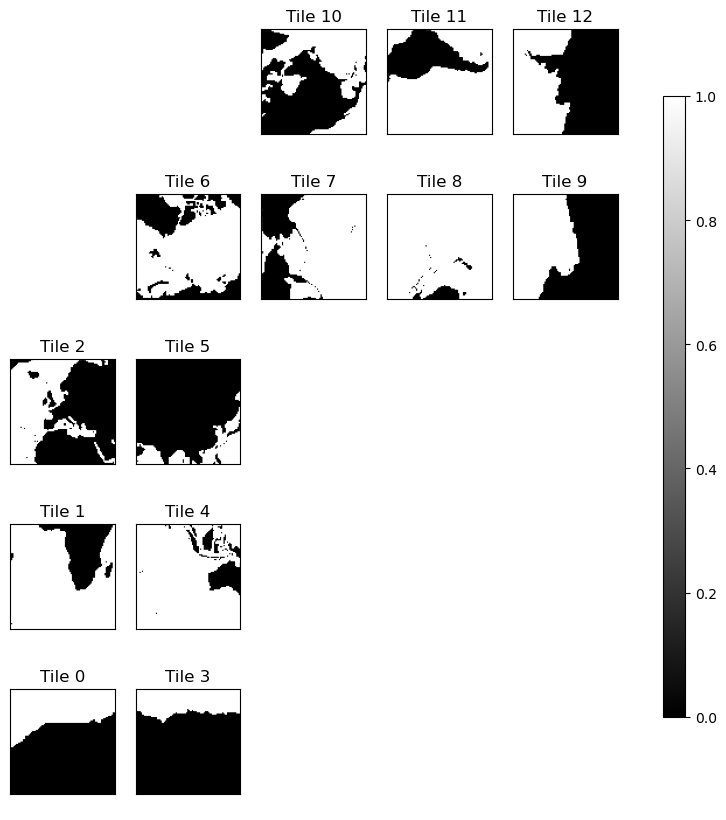

In [6]:
ecco.plot_tiles(grid.hFacC.isel(k=0), cmap='gray', show_colorbar=True,);

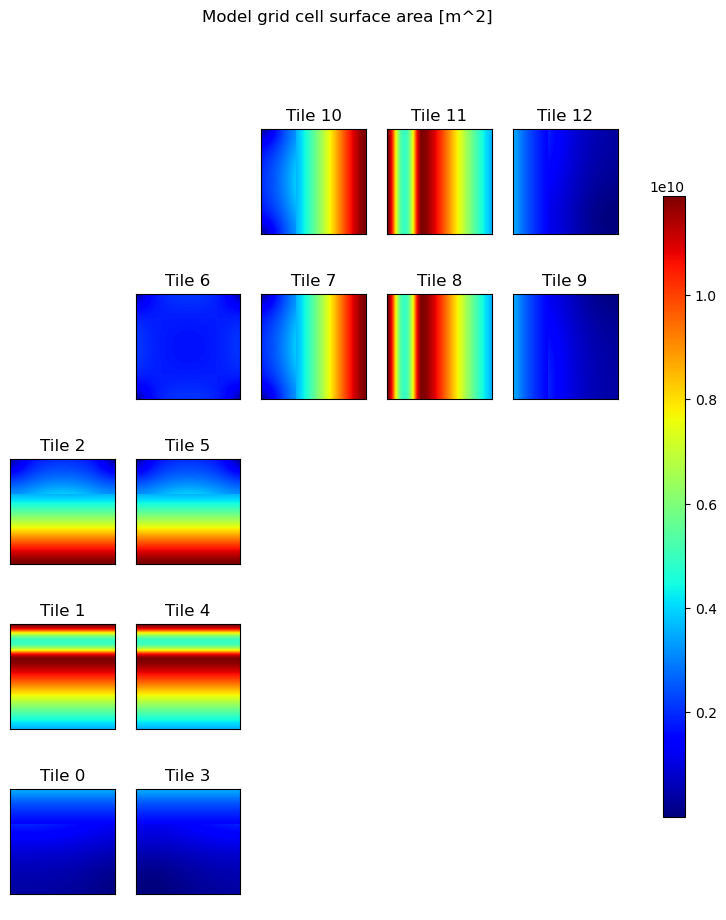

In [7]:
ecco.plot_tiles(grid.rA, cmap='jet', show_colorbar=True);
plt.suptitle('Model grid cell surface area [m^2]')

plt.show()

### Plot subset of global domain

Once the file has been "opened" using ``open_dataset``, we can use `Dataset.isel` to subset the file if we don't want to plot the full global domain.

In [8]:
grid_subset = grid.isel(tile=[1,10,12],k=[0,1,2,3])
grid_subset

<xarray.Dataset> Size: 4MB
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 4, k_u: 50, k_l: 50, k_p1: 51,
              tile: 3, nb: 4, nv: 2)
Coordinates: (12/20)
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 16B 0 1 2 3
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    ...       ...
    Zp1      (k_p1) float32 204B dask.array<chunksize=(51,), meta=np.ndarray>
    Zu       (k_u) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    Zl       (k_l) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    XC_bnds  (tile, j, i, nb) float32 389kB dask.array<chunksize=(3, 90, 90, 4), meta=np.ndarray>
    YC_bnds  (tile, j, i, nb) float32 389kB dask.array<chunksize=(3, 90, 90, 4), meta=np.ndarray>
    Z_bnds   (k, nv) float32 32B dask.array<chunksize=(4, 2), meta=np.ndarray>
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    SN       (tile, j, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    rA       (tile, j, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    dxG      (tile, j_g, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    dyG      (tile, j, i_g) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    Depth    (tile, j, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    ...       ...
    hFacC    (k, tile, j, i) float32 389kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    hFacW    (k, tile, j, i_g) float32 389kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    hFacS    (k, tile, j_g, i) float32 389kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    maskC    (k, tile, j, i) bool 97kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    maskW    (k, tile, j, i_g) bool 97kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    maskS    (k, tile, j_g, i) bool 97kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

Notice that ``grid_subset`` only has 3 tiles (1, 10, 12) and 4 depth levels (0, 1, 2, 3), as expected. The subset indices can also be passed to `isel` as a Python dictionary, with the same result.

In [9]:
subset_ind = {'tile':[1,10,12],'k':[0,1,2,3]}

grid_subset = grid.isel(subset_ind)
grid_subset

<xarray.Dataset> Size: 4MB
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 4, k_u: 50, k_l: 50, k_p1: 51,
              tile: 3, nb: 4, nv: 2)
Coordinates: (12/20)
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 16B 0 1 2 3
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    ...       ...
    Zp1      (k_p1) float32 204B dask.array<chunksize=(51,), meta=np.ndarray>
    Zu       (k_u) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    Zl       (k_l) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    XC_bnds  (tile, j, i, nb) float32 389kB dask.array<chunksize=(3, 90, 90, 4), meta=np.ndarray>
    YC_bnds  (tile, j, i, nb) float32 389kB dask.array<chunksize=(3, 90, 90, 4), meta=np.ndarray>
    Z_bnds   (k, nv) float32 32B dask.array<chunksize=(4, 2), meta=np.ndarray>
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    SN       (tile, j, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    rA       (tile, j, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    dxG      (tile, j_g, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    dyG      (tile, j, i_g) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    Depth    (tile, j, i) float32 97kB dask.array<chunksize=(3, 90, 90), meta=np.ndarray>
    ...       ...
    hFacC    (k, tile, j, i) float32 389kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    hFacW    (k, tile, j, i_g) float32 389kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    hFacS    (k, tile, j_g, i) float32 389kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    maskC    (k, tile, j, i) bool 97kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    maskW    (k, tile, j, i_g) bool 97kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
    maskS    (k, tile, j_g, i) bool 97kB dask.array<chunksize=(4, 1, 45, 45), meta=np.ndarray>
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

Let's plot ``hFacC`` and ``rA`` again

'Model grid cell surface area [m^2] in tiles 1, 10, and 12 '

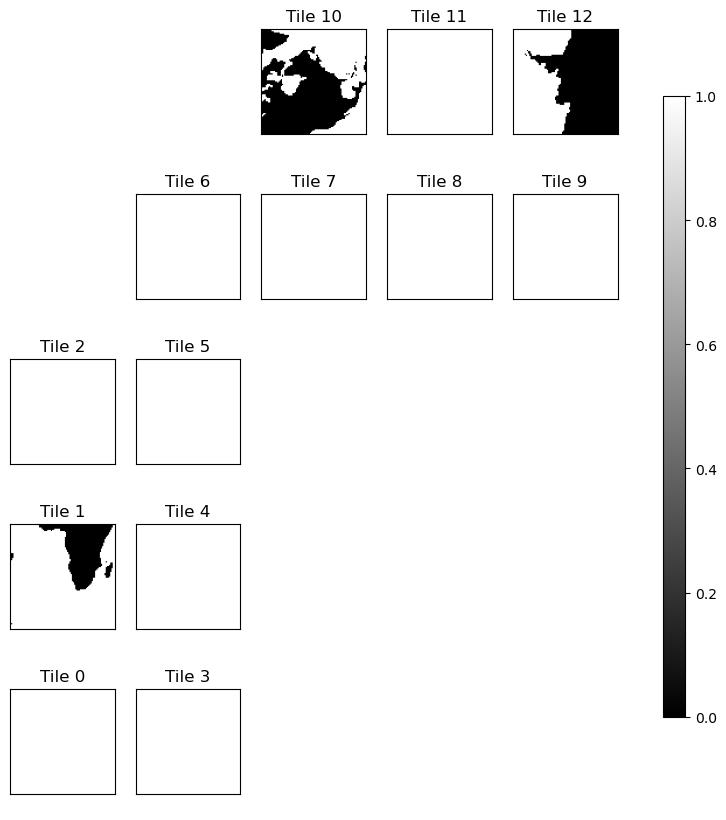

In [10]:
ecco.plot_tiles(grid_subset.hFacC.isel(k=0), cmap='gray', show_colorbar=True,);
'Model grid cell surface area [m^2] in tiles 1, 10, and 12 '

Notice that 10 of the 13 tiles are blank because they were not loaded.

'Model grid cell surface area [m^2]'

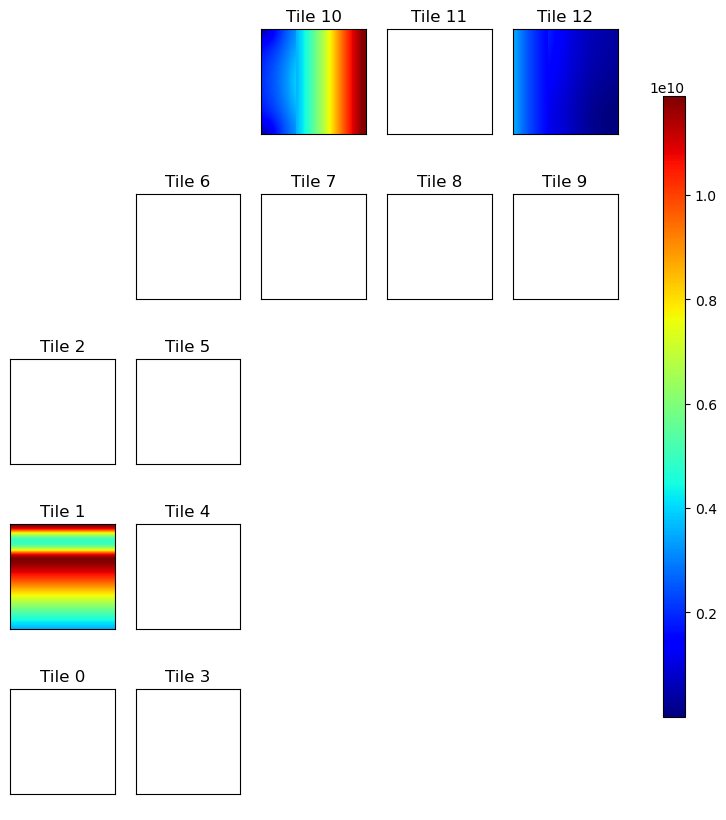

In [11]:
ecco.plot_tiles(grid_subset.rA, cmap='jet', show_colorbar=True);
'Model grid cell surface area [m^2]'